In [122]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

## Read the data

In [123]:
canto_data = pd.read_csv('./output/full_cantometrics.csv')

x,y = ([] for i in range(2))
for i, row in canto_data['lat'].iteritems():
    try:
        if row =='19,27':
            y.append(19.27)
        elif row == ' ':
            y.append(40.7410861)
        else:
            y.append(float(row))
    except ValueError as e:
        print(i, e)
for i, row in canto_data['lng'].iteritems():
    x.append(float(row))

In [124]:
nasality = canto_data[['canto_coding_id','culture','lat','lng','cv_34']]
polyphony = canto_data[['canto_coding_id','culture','lat','lng','cv_4']]

## Write data

In [125]:
n = nasality.columns[2]
nasality.drop(n, axis = 1, inplace = False)
nasality[n] = x

n = nasality.columns[3]
nasality.drop(n, axis = 1, inplace = False)
nasality[n] = y

nasality.to_csv('./data/nasality.csv')

n = polyphony.columns[2]
polyphony.drop(n, axis = 1, inplace = False)
polyphony[n] = x

n = polyphony.columns[3]
polyphony.drop(n, axis = 1, inplace = False)
polyphony[n] = y

polyphony.to_csv('./data/polyphony.csv')

<ipython-input-125-bfe0b0d374a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasality[n] = x
<ipython-input-125-bfe0b0d374a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasality[n] = y
<ipython-input-125-bfe0b0d374a7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

## Plot the data

In [126]:
import cartopy.crs as ccrs
from matplotlib import colors
import cartopy.feature as cfeature

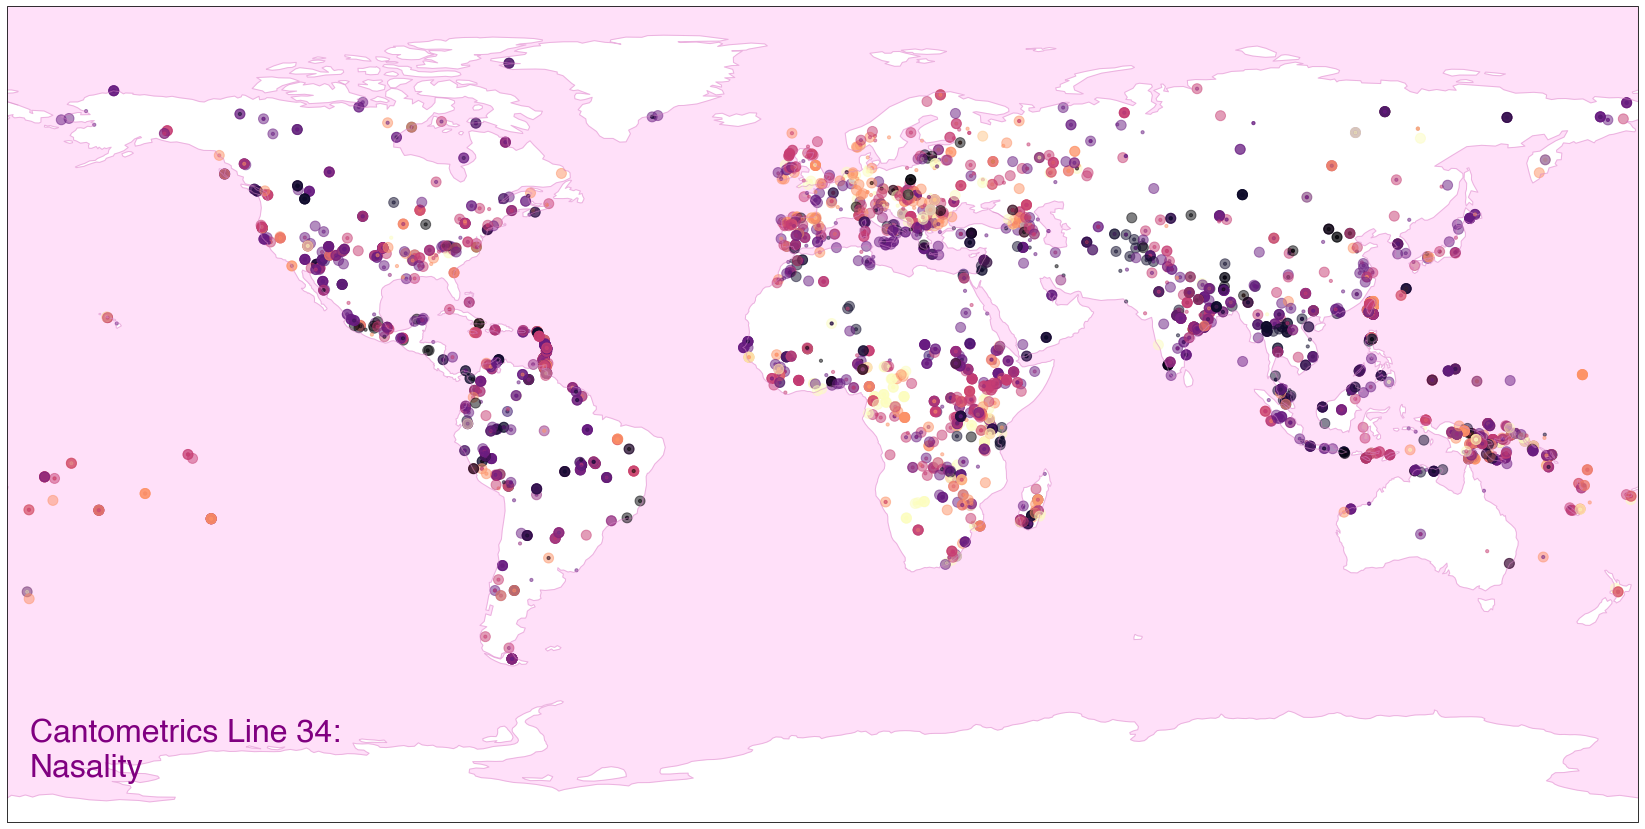

In [127]:
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(alpha=.5, color="#D88CC9")
ax.text(-175, -80, 'Cantometrics Line 34:\nNasality', fontsize=32, fontfamily="Helvetica", color="Purple")
ax.scatter(x,  y,
           s=nasality["cv_34"], 
           c=nasality["cv_34"], 
           cmap="magma", 
           sizes=(10, 100), 
           alpha=.5, 
           marker='o')
ax.add_feature(cfeature.OCEAN, alpha=.6, color="#FFCCF5") 

plt.savefig('./figs/nasality.png')

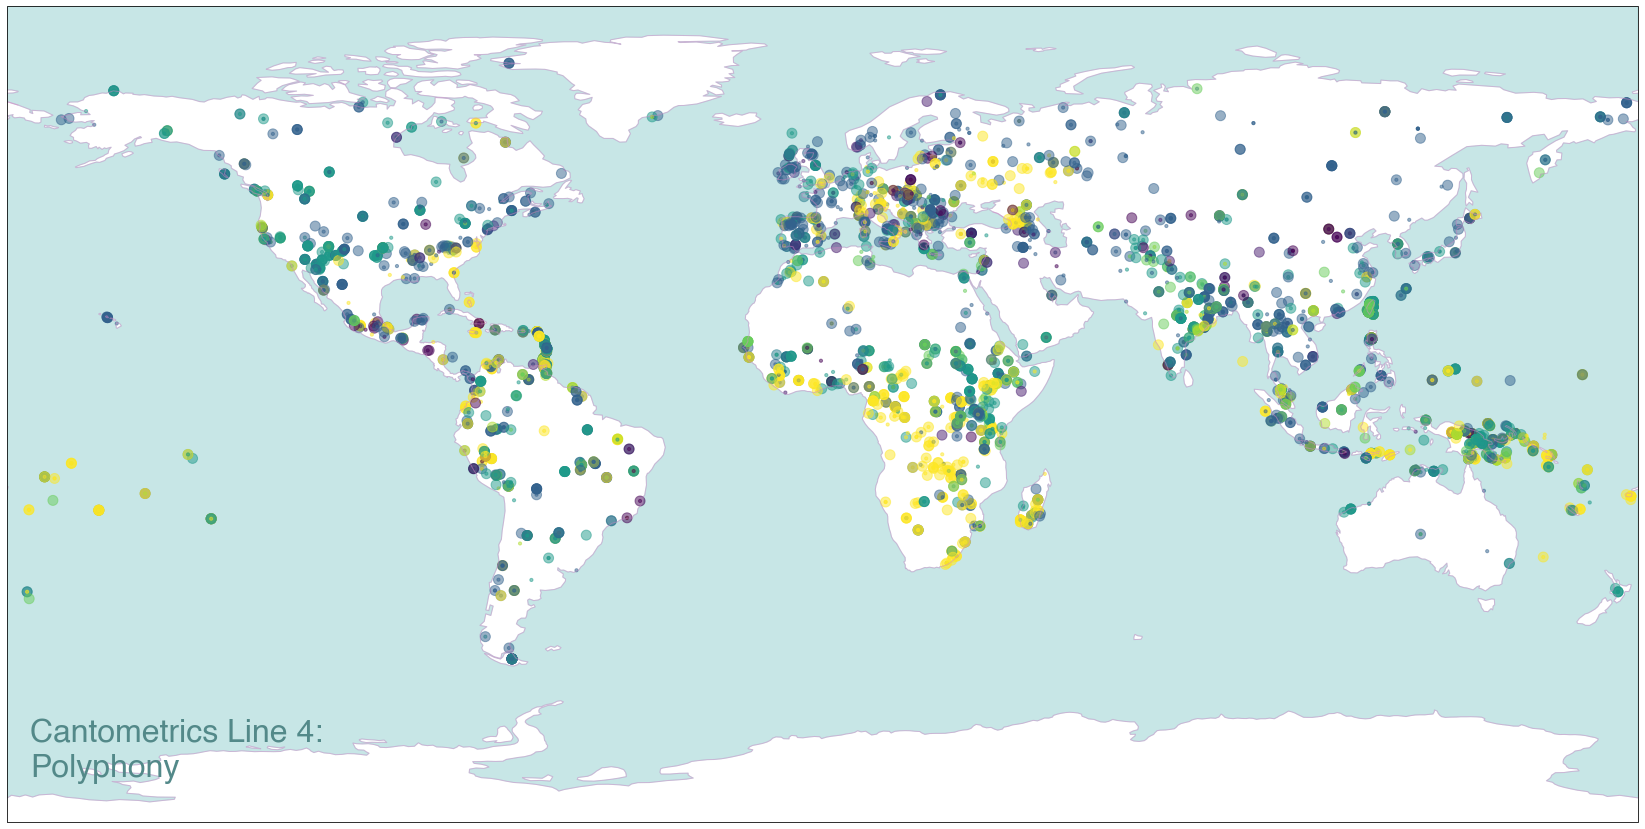

In [128]:
fig = plt.figure(figsize=(30,15))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(alpha=.5, color="#D88CC9")
ax.text(-175, -80, 'Cantometrics Line 4:\nPolyphony', fontsize=32, fontfamily="Helvetica", color="#538989")
ax.scatter(x,  y,
           s=polyphony["cv_4"], 
           c=polyphony["cv_4"], 
           sizes=(10, 100), 
           alpha=.5, 
           marker='o')
ax.add_feature(cfeature.OCEAN, alpha=.6, color="#A2D6D6") 
plt.savefig('./figs/polyphony.png')